<a href="https://colab.research.google.com/github/cyork1/env789/blob/main/env_789_problem_set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cate York / February 13, 2024
# ENV 789 / Problem Set 1

# import packages and read in the pre-cleaned data
import pandas as pd
import numpy as np
from plotnine import *
import plotnine
import statsmodels.formula.api as smf
from google.colab import drive

In [2]:
df_le = pd.read_excel('https://github.com/cyork1/env789/raw/data/LE%20at%20birth%20(years)%20(1990-2021).xlsx')
df_education = pd.read_excel('https://github.com/cyork1/env789/raw/data/Education%20Index%20(1990-2021).xlsx')
df_hdi = pd.read_excel('https://github.com/cyork1/env789/raw/data/Humand%20Development%20Index%20(1990-2021).xlsx')
df_mpi = pd.read_excel('https://github.com/cyork1/env789/raw/main/MPI_table_1.xlsx')
df_gdp = pd.read_excel('https://github.com/cyork1/env789/raw/main/GDP%20Per%20Capita%20(2017%20PPP%20International%20$)%20(from%20World%20Bank).xlsx')
df_income = pd.read_excel('https://github.com/cyork1/env789/raw/data/Income%20Index%20(1990-2021).xlsx')

In [3]:
# Part 1: Correlation between GDP and LE

In [4]:
# inspect data
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   1990            207 non-null    float64
 4   1991            208 non-null    float64
 5   1992            210 non-null    float64
 6   1993            211 non-null    float64
 7   1994            213 non-null    float64
 8   1995            223 non-null    float64
 9   1996            223 non-null    float64
 10  1997            226 non-null    float64
 11  1998            226 non-null    float64
 12  1999            227 non-null    float64
 13  2000            233 non-null    float64
 14  2001            234 non-null    float64
 15  2002            235 non-null    float64
 16  2003            235 non-null    float64
 17  2004            236 non-null    flo

In [5]:
df_gdp.nunique()

country           266
Country Code      266
Indicator Name      1
1990              206
1991              206
1992              208
1993              209
1994              211
1995              221
1996              221
1997              224
1998              224
1999              225
2000              231
2001              233
2002              233
2003              233
2004              234
2005              234
2006              235
2007              235
2008              236
2009              237
2010              237
2011              238
2012              238
2013              240
2014              240
2015              240
2016              240
2017              240
2018              240
2019              240
2020              240
2021              240
dtype: int64

In [6]:
df_gdp_long = df_gdp.drop(columns=['Indicator Name','Country Code'])

In [7]:
df_gdp_long.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,32278.868539,33744.108798,34544.060647,35957.815973,37683.917709,37470.173867,36784.460791,38202.407752,37810.034823,...,35410.115916,37406.173522,36558.972837,36099.942636,36504.688731,38868.333923,39597.659876,38511.336876,29236.047264,37333.515685
1,Africa Eastern and Southern,3045.457644,2963.585471,2831.236489,2744.839315,2722.151263,2771.429569,2845.890397,2893.971060,2875.397677,...,3553.263071,3602.676618,3652.772991,3668.400279,3664.810708,3670.972022,3672.750831,3658.128493,3467.484700,3531.172747
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2122.830759,2165.340915,2144.449634,2108.714173,2101.422187,2096.093111,2060.698973,2079.921861,1968.341002,1516.273265
3,Africa Western and Central,2790.264157,2752.715449,2745.707708,2646.355086,2576.747600,2563.405973,2614.006634,2656.292023,2678.386558,...,3903.405917,4027.814199,4148.495951,4152.506646,4060.345071,4054.572453,4068.321122,4096.827363,3960.847898,4016.874461
4,Angola,5793.084512,5659.119330,5158.383835,3799.194899,3728.886199,4149.445734,4557.147774,4728.292342,4790.418610,...,8011.050095,8099.678828,8183.164577,7966.885556,7487.925098,7216.061373,6878.590025,6602.269211,6029.691895,5911.835657


In [8]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        206 non-null    object 
 1   hdi_rank_2021  191 non-null    float64
 2   1990           206 non-null    float64
 3   1991           206 non-null    float64
 4   1992           206 non-null    float64
 5   1993           206 non-null    float64
 6   1994           206 non-null    float64
 7   1995           206 non-null    float64
 8   1996           206 non-null    float64
 9   1997           206 non-null    float64
 10  1998           206 non-null    float64
 11  1999           206 non-null    float64
 12  2000           206 non-null    float64
 13  2001           206 non-null    float64
 14  2002           206 non-null    float64
 15  2003           206 non-null    float64
 16  2004           206 non-null    float64
 17  2005           206 non-null    float64
 18  2006      

In [9]:
df_le.nunique()

country          206
hdi_rank_2021    162
1990             206
1991             206
1992             206
1993             206
1994             206
1995             205
1996             206
1997             206
1998             206
1999             206
2000             206
2001             206
2002             206
2003             206
2004             206
2005             206
2006             206
2007             206
2008             206
2009             206
2010             206
2011             206
2012             206
2013             206
2014             206
2015             206
2016             206
2017             206
2018             206
2019             206
2020             206
2021             206
dtype: int64

In [10]:
df_le_long = df_le.drop(columns=['hdi_rank_2021'])

In [11]:
df_le_long.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,45.9672,46.6631,47.5955,51.4664,51.4945,52.5442,53.2433,53.6342,52.9431,...,61.9230,62.4167,62.5451,62.6587,63.1361,63.0160,63.0810,63.5645,62.5751,61.9824
1,Angola,41.8933,43.8127,42.2088,42.1009,43.4217,45.8491,46.0329,46.3065,45.0570,...,58.6231,59.3074,60.0397,60.6546,61.0923,61.6798,62.1438,62.4484,62.2612,61.6434
2,Albania,73.1439,73.3776,73.7148,73.9391,74.1313,74.3616,74.5923,73.9039,74.9899,...,78.0640,78.1226,78.4075,78.6441,78.8602,79.0473,79.1838,79.2825,76.9893,76.4626
3,Andorra,78.4063,77.9805,80.3241,78.6633,82.6380,78.9616,80.3340,80.9439,79.4259,...,82.9166,82.9343,82.9483,82.9534,82.9671,82.9803,82.9923,83.0039,79.0234,80.3684
4,United Arab Emirates,71.9004,72.2414,72.3062,72.5213,72.5982,72.6945,72.7674,72.9367,73.0658,...,78.7155,78.8528,79.0442,79.2232,79.3347,79.5036,79.6274,79.7262,78.9457,78.7104


In [12]:
# melt the data long to prepare to merge LE and GDP
df_gdp_long = pd.melt(df_gdp_long, id_vars='country', var_name='year', value_name='GDP_per_cap')
df_gdp_long.head()

,country,year,GDP_per_cap
0,Aruba,1990,32278.868539
1,Africa Eastern and Southern,1990,3045.457644
2,Afghanistan,1990,NaN
3,Africa Western and Central,1990,2790.264157
4,Angola,1990,5793.084512


In [13]:
df_le_long = pd.melt(df_le_long, id_vars='country', var_name='year', value_name='life_expectancy')
df_le_long.head()

,country,year,life_expectancy
0,Afghanistan,1990,45.9672
1,Angola,1990,41.8933
2,Albania,1990,73.1439
3,Andorra,1990,78.4063
4,United Arab Emirates,1990,71.9004


In [14]:
df_gdp_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8512 entries, 0 to 8511
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      8512 non-null   object 
 1   year         8512 non-null   object 
 2   GDP_per_cap  7431 non-null   float64
dtypes: float64(1), object(2)
memory usage: 199.6+ KB


In [15]:
df_le_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6592 entries, 0 to 6591
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          6592 non-null   object 
 1   year             6592 non-null   object 
 2   life_expectancy  6592 non-null   float64
dtypes: float64(1), object(2)
memory usage: 154.6+ KB


In [16]:
# merge LE and GDP data
df_gdp_le = pd.merge(df_gdp_long, df_le_long, how='left', on=['country','year']).copy()

In [17]:
df_gdp_le = df_gdp_le.sort_values(by=['country', 'year'])
df_gdp_le.head()

,country,year,GDP_per_cap,life_expectancy
2,Afghanistan,1990,NaN,45.9672
268,Afghanistan,1991,NaN,46.6631
534,Afghanistan,1992,NaN,47.5955
800,Afghanistan,1993,NaN,51.4664
1066,Afghanistan,1994,NaN,51.4945


In [18]:
df_gdp_le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8512 entries, 2 to 8511
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          8512 non-null   object 
 1   year             8512 non-null   object 
 2   GDP_per_cap      7431 non-null   float64
 3   life_expectancy  5536 non-null   float64
dtypes: float64(2), object(2)
memory usage: 332.5+ KB


In [19]:
# calculate the correlation coefficient between LE and GDP per country
df_gdp_le_corr = df_gdp_le.groupby('country')['life_expectancy'].corr(df_gdp_le['GDP_per_cap']).reset_index()

In [20]:
df_gdp_le_corr.rename(columns={'life_expectancy': 'gdp_le_corr'}, inplace=True)

In [21]:
# discard missing correlations to observe lowest/highest
df_gdp_le_corr = df_gdp_le_corr[df_gdp_le_corr.gdp_le_corr.notna()]

In [22]:
df_gdp_le_corr

,country,gdp_le_corr
0,Afghanistan,0.907164
3,Albania,0.912056
4,Algeria,0.956816
7,Angola,0.797194
8,Antigua and Barbuda,0.518497
...,...,...
257,Vanuatu,0.294763
259,Viet Nam,0.851100
262,World,0.977637
264,Zambia,0.990321


In [23]:
# sort the correlation indices in ascending order
#df_gdp_le_corr =
df_gdp_le_corr.sort_values(by='gdp_le_corr')
# lowest correlations (ascending): UAE, Palau, Burundi, Gabon, CAR
# highest correlations (ascending): Morocco, Australia, Austria, Zambia, Uganda

,country,gdp_le_corr
251,United Arab Emirates,-0.879828
189,Palau,-0.802358
34,Burundi,-0.797962
85,Gabon,-0.763858
41,Central African Republic,-0.554147
...,...,...
167,Morocco,0.985200
13,Australia,0.986698
14,Austria,0.986945
264,Zambia,0.990321


In [24]:
df_gdp_le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8512 entries, 2 to 8511
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          8512 non-null   object 
 1   year             8512 non-null   object 
 2   GDP_per_cap      7431 non-null   float64
 3   life_expectancy  5536 non-null   float64
dtypes: float64(2), object(2)
memory usage: 590.5+ KB


In [25]:
df_gdp_le.describe()

,GDP_per_cap,life_expectancy
count,7431.000000,5536.000000
mean,17132.880164,68.611675
std,19348.133446,9.787263
min,430.413544,14.098500
25%,3620.129472,62.544550
50%,10033.074800,70.675000
75%,23938.323484,76.005850
max,157600.647353,86.542400


In [26]:
# compare the coefficient of variation for each variable
# 1.129 for GDP
df_gdp_le['GDP_per_cap'].std() / df_gdp_le['GDP_per_cap'].mean()

1.129298358530924

In [27]:
df_gdp_le['life_expectancy'].std() / df_gdp_le['life_expectancy'].mean()
# 0.142 for life expectancy
# greater dispersion for GDP
# I tried to plot the GDP and life expectancy to see how robust they are, but I couldn't get the code to work

0.14264719279656454

In [28]:
# graph the GDP vs. LE (on average)
df_gdp_le.year = df_gdp_le.year.astype('int64')

In [29]:
df_gdp_le_graph = df_gdp_le.groupby('year').agg(avg_gdp=('GDP_per_cap','mean'),avg_le=('life_expectancy','mean')).reset_index()

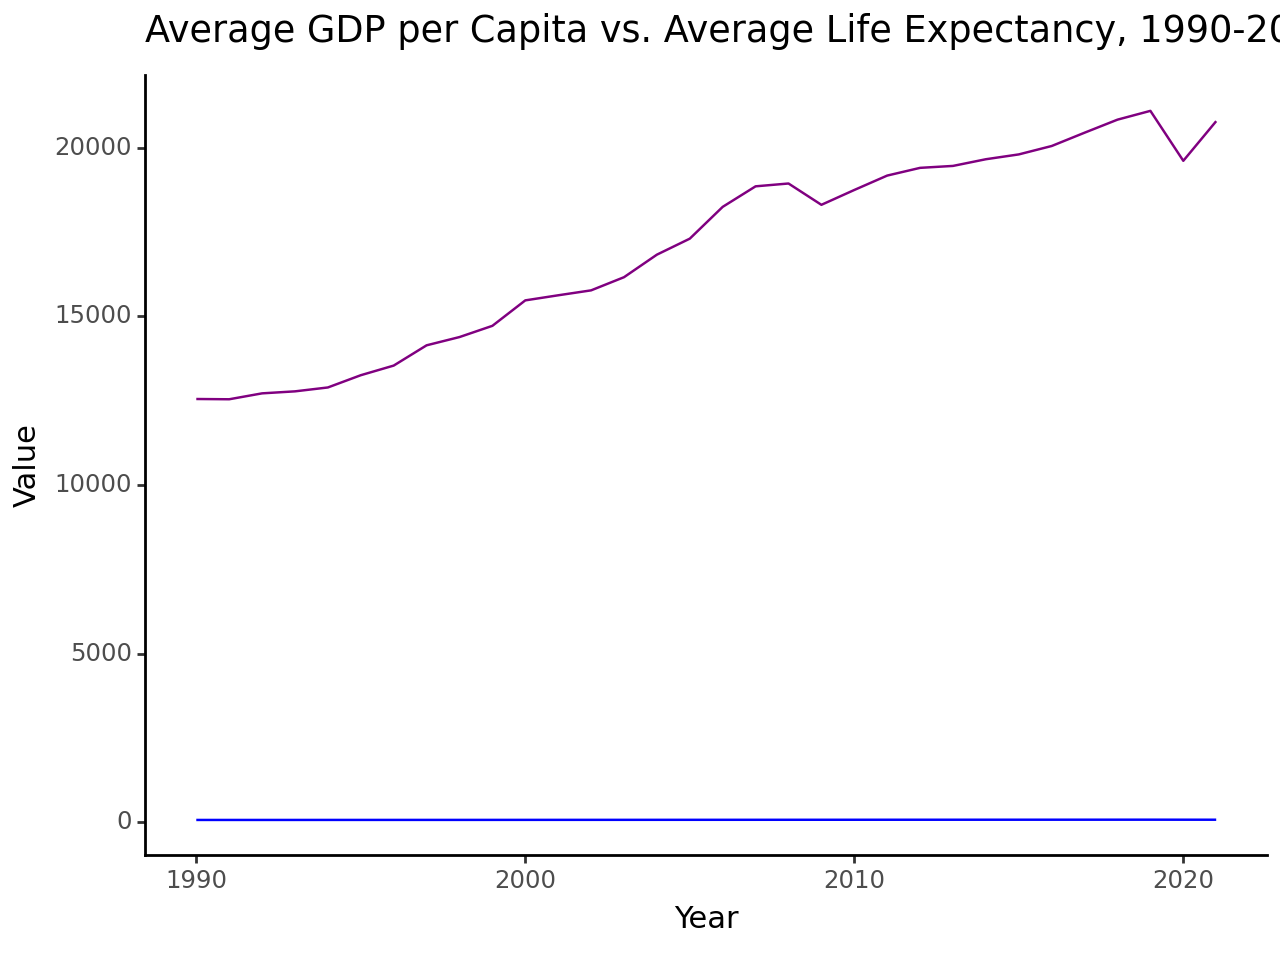

<Figure Size: (640 x 480)>

In [30]:
(
    ggplot(df_gdp_le_graph)
    + geom_line(aes(x='year', y='avg_gdp'), color='purple')
    + geom_line(aes(x='year', y='avg_le'), color='blue')
    + xlab('Year')
    + ylab('Value')
    + ggtitle('Average GDP per Capita vs. Average Life Expectancy, 1990-2021')
    + theme_classic()
)

In [31]:
# The UAE appears to have the correlation coefficient with the lowest magnitude and Uganda the highest
# This indicates that life expectancy and GDP are highly correlated in Uganda, and negatively correlated in the UAE, but I'm not exactly sure why
# It could be that as GDP has increased for the UAE, life expectancy has not, because of the high level of income inequality in that country (and the others with negative correlation coefficients)
# As discussed in class, life expectancy is a more robust indicator over time (doesn't fluctuate as easily as GDP, which is more volatile)
# from the graph (aggregated per year across countries), life expectancy is practically flat, whereas aggregate GDP is growing over time

In [32]:
# Part 2: Growth in GDP vs LE over time
# calculate the CAGR for both time series over the time period of available data
# define the compound average growth rate (CAGR) function

In [33]:
df_gdp_le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8512 entries, 2 to 8511
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          8512 non-null   object 
 1   year             8512 non-null   int64  
 2   GDP_per_cap      7431 non-null   float64
 3   life_expectancy  5536 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 590.5+ KB


In [34]:
# need only non-null values for CAGR
df_gdp_cagr = df_gdp_le[df_gdp_le.GDP_per_cap.notnull()]

In [35]:
df_gdp_cagr = df_gdp_cagr.sort_values('year')

In [36]:
df_gdp_cagr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7431 entries, 109 to 8511
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          7431 non-null   object 
 1   year             7431 non-null   int64  
 2   GDP_per_cap      7431 non-null   float64
 3   life_expectancy  5111 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 290.3+ KB


In [37]:
df_gdp_cagr = df_gdp_le.groupby('country').agg(
    beginning_gdp=('GDP_per_cap', 'first'),
    ending_gdp=('GDP_per_cap', 'last')
).reset_index()

In [38]:
df_gdp_cagr_years = df_gdp_long[df_gdp_long.GDP_per_cap.notnull()]

In [39]:
df_gdp_cagr_years = df_gdp_cagr_years.sort_values(['country','year'])

In [40]:
df_gdp_cagr_years = df_gdp_cagr_years.groupby('country').agg(beginning_year=('year','min'),ending_year=('year','max')).reset_index()

In [41]:
df_gdp_cagr_years['num_years_gdp'] = df_gdp_cagr_years.ending_year - df_gdp_cagr_years.beginning_year

In [42]:
df_gdp_cagr_final = pd.merge(df_gdp_cagr, df_gdp_cagr_years, how='left', on='country')

In [43]:
df_gdp_cagr_final['CAGR_gdp_perc'] = ((((df_gdp_cagr_final.ending_gdp/df_gdp_cagr_final.beginning_gdp) ** (1/df_gdp_cagr_final.num_years_gdp))-1)*100)

In [44]:
df_gdp_cagr_final
# Afghanistan is 0.89%, Zimbabwe is -0.79%

,country,beginning_gdp,ending_gdp,beginning_year,ending_year,num_years_gdp,CAGR_gdp_perc
0,Afghanistan,1280.463171,1516.273265,2002.0,2021.0,19.0,0.893620
1,Africa Eastern and Southern,3045.457644,3531.172747,1990.0,2021.0,31.0,0.478492
2,Africa Western and Central,2790.264157,4016.874461,1990.0,2021.0,31.0,1.182315
3,Albania,4827.051242,14596.015558,1990.0,2021.0,31.0,3.633864
4,Algeria,8828.874473,11029.138782,1990.0,2021.0,31.0,0.720367
...,...,...,...,...,...,...,...
261,West Bank and Gaza,3951.205493,5641.044400,1994.0,2021.0,27.0,1.327431
262,World,9718.103415,17087.192102,1990.0,2021.0,31.0,1.837119
263,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN
264,Zambia,2290.039226,3287.420524,1990.0,2021.0,31.0,1.173067


In [45]:
# repeat for life expectancy
df_le_cagr = df_gdp_le[df_gdp_le.life_expectancy.notnull()]
df_le_cagr = df_le_cagr.sort_values('year')
df_le_cagr = df_gdp_le.groupby('country').agg(
    beginning_le=('life_expectancy', 'first'),
    ending_le=('life_expectancy', 'last')
).reset_index()
df_le_cagr_years = df_le_long[df_le_long.life_expectancy.notnull()]
df_le_cagr_years = df_le_cagr_years.sort_values(['country','year'])
df_le_cagr_years = df_le_cagr_years.groupby('country').agg(beginning_year=('year','min'),ending_year=('year','max')).reset_index()
df_le_cagr_years['num_years_le'] = df_le_cagr_years.ending_year - df_le_cagr_years.beginning_year

In [46]:
df_le_cagr_final = pd.merge(df_le_cagr, df_le_cagr_years, how='left', on='country')

In [47]:
df_le_cagr_final['CAGR_le_perc'] = ((((df_le_cagr_final.ending_le/df_le_cagr_final.beginning_le) ** (1/df_le_cagr_final.num_years_le))-1)*100)

In [48]:
df_le_cagr_final
# Afghanistan is 0.96%, Zimbabwe is -0.009%

,country,beginning_le,ending_le,beginning_year,ending_year,num_years_le,CAGR_le_perc
0,Afghanistan,45.967200,61.982400,1990.0,2021.0,31.0,0.968930
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,73.143900,76.462600,1990.0,2021.0,31.0,0.143241
4,Algeria,67.416000,76.376700,1990.0,2021.0,31.0,0.403377
...,...,...,...,...,...,...,...
261,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN
262,World,65.144798,71.365465,1990.0,2021.0,31.0,0.294632
263,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN
264,Zambia,47.926300,61.223400,1990.0,2021.0,31.0,0.793015


In [49]:
# in which countries does GDP out-perform LE, and vice versa?
# group by for 2 variables - would have 2 values for each country, then filter by the countries
df_cagr_comp = pd.merge(df_le_cagr_final, df_gdp_cagr_final, how='left', on='country')

In [50]:
df_cagr_comp_gdp = df_cagr_comp[df_cagr_comp.CAGR_gdp_perc>df_cagr_comp.CAGR_le_perc]

In [51]:
df_cagr_comp_gdp.country.nunique()

140

In [52]:
df_cagr_comp_gdp.country.unique()
# GDP outperforms LE in 140 countries, including:
# 'Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
# 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
# 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
# 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
# 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Canada', 'Chad',
# 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
# 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
# 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Estonia',
# 'Ethiopia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
# 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guyana',
# 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland',
# 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
# 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Lesotho', 'Lithuania',
# 'Luxembourg', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
# 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico',
# 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar',
# 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand',
# 'Nicaragua', 'Nigeria', 'North Macedonia', 'Norway', 'Oman',
# 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay',
# 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania',
# 'Russian Federation', 'Rwanda', 'Samoa', 'Sao Tome and Principe',
# 'Senegal', 'Serbia', 'Seychelles', 'Singapore', 'Slovenia',
# 'Solomon Islands', 'Somalia', 'South Africa', 'South Asia',
# 'Spain', 'Sri Lanka', 'Sub-Saharan Africa', 'Sudan', 'Sweden',
# 'Switzerland', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga',
# 'Trinidad and Tobago', 'Tunisia', 'Turkmenistan', 'Tuvalu',
# 'Uganda', 'United Kingdom', 'United States', 'Uruguay',
# 'Uzbekistan', 'Viet Nam', 'World', 'Zambia'

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Canada', 'Chad',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guyana',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Lesotho', 'Lithuania',
       'Luxembourg', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Marshall Island

In [53]:
df_cagr_comp_le = df_cagr_comp[df_cagr_comp.CAGR_gdp_perc<df_cagr_comp.CAGR_le_perc]

In [54]:
df_cagr_comp_le.country.nunique()

26

In [55]:
df_cagr_comp_le.country.unique()
# LE outperforms GDP in 26 countries, including:
# 'Afghanistan', 'Angola', 'Barbados', 'Brunei Darussalam',
# 'Burundi', 'Cameroon', 'Central African Republic', 'Comoros',
# 'Gabon', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kiribati', 'Liberia',
# 'Libya', 'Madagascar', 'Niger', 'San Marino', 'Saudi Arabia',
# 'Sierra Leone', 'Suriname', 'Tajikistan', 'Ukraine',
# 'United Arab Emirates', 'Vanuatu', 'Zimbabwe'


array(['Afghanistan', 'Angola', 'Barbados', 'Brunei Darussalam',
       'Burundi', 'Cameroon', 'Central African Republic', 'Comoros',
       'Gabon', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kiribati', 'Liberia',
       'Libya', 'Madagascar', 'Niger', 'San Marino', 'Saudi Arabia',
       'Sierra Leone', 'Suriname', 'Tajikistan', 'Ukraine',
       'United Arab Emirates', 'Vanuatu', 'Zimbabwe'], dtype=object)

In [56]:
# why do these differences occur? are there patterns among countries?
# this makes sense given the earlier conclusion that GDP is more volatile, given there is a greater potential for growth over the specified period
# the LE>GDP category does not include high income countries, where the GDP would be expected to grow more quickly than LE
# the lowest correlations for LE and GDP were UAE, Palau, Burundi, Gabon, CAR, and some of these are also in the LE>GDP category

In [57]:
# Part 3: Geometric vs Arithmetic Mean

In [58]:
# create the LE index by normalizing a variable with the LE
# I normalized using the HDI documentation method of 20 as minimum and 85 as maximum, or 65 as the range
df_le_long['le_index'] = ((df_le_long.life_expectancy - 20)/65)

In [59]:
# repeat for education, "pre-normalized"
# melt education dataframe long
df_education_long = pd.melt(df_education, id_vars='country', var_name='year', value_name='education')
df_education_long = df_education_long.sort_values(['country','year'])

In [60]:
# repeat for income, "pre-normalized"
# melt income dataframe long
df_income_long = pd.melt(df_income, id_vars='country', var_name='year', value_name='income')
df_income_long = df_income_long.sort_values(['country','year'])

In [61]:
df_le_income = pd.merge(df_le_long, df_income_long, how='left', on=['country','year'])

In [62]:
df_hdi = pd.merge(df_le_income, df_education_long, how='left', on=['country','year'])

In [63]:
df_hdi = df_hdi.sort_values(['country','year'])

In [64]:
# need to drop null values to use gmean function
df_hdi = df_hdi.dropna()

In [65]:
df_hdi

,country,year,life_expectancy,le_index,income,education
0,Afghanistan,1990,45.9672,0.399495,0.50,0.100
206,Afghanistan,1991,46.6631,0.410202,0.47,0.115
412,Afghanistan,1992,47.5955,0.424546,0.46,0.120
618,Afghanistan,1993,51.4664,0.484098,0.41,0.130
824,Afghanistan,1994,51.4945,0.484531,0.36,0.145
...,...,...,...,...,...,...
5756,Zimbabwe,2017,60.7095,0.626300,0.55,0.610
5962,Zimbabwe,2018,61.4141,0.637140,0.55,0.620
6168,Zimbabwe,2019,61.2925,0.635269,0.54,0.625
6374,Zimbabwe,2020,61.1242,0.632680,0.54,0.625


In [66]:
# calculate HDI arithmetically for Nepal
df_hdi_nepal = df_hdi[df_hdi['country']=='Nepal'].copy()

In [67]:
df_hdi_nepal['hdi_arith'] = df_hdi_nepal[['le_index', 'income', 'education']].mean(axis=1)

In [68]:
# calculate HDI arithmetically for Switzerland
df_hdi_switzerland = df_hdi[df_hdi['country']=='Switzerland'].copy()

In [69]:
df_hdi_switzerland['hdi_arith'] = df_hdi_switzerland[['le_index', 'income', 'education']].mean(axis=1)

In [70]:
# calculate the HDI geometrically for Nepal
df_hdi_nepal['hdi_geom'] = ((df_hdi_nepal.le_index * df_hdi_nepal.income * df_hdi_nepal.education)**(1/3))

In [71]:
# calculate the HDI geometrically for Switzerland
df_hdi_switzerland['hdi_geom'] = ((df_hdi_switzerland.le_index * df_hdi_switzerland.income * df_hdi_switzerland.education)**(1/3))

In [72]:
df_hdi_nepal
# 1990: arithmetic is 0.413632, geometric is 0.400306

,country,year,life_expectancy,le_index,income,education,hdi_arith,hdi_geom
131,Nepal,1990,54.8333,0.535897,0.42,0.285,0.413632,0.400306
337,Nepal,1991,55.7116,0.549409,0.42,0.290,0.419803,0.405989
543,Nepal,1992,56.7101,0.564771,0.42,0.300,0.428257,0.414395
749,Nepal,1993,57.6189,0.578752,0.43,0.305,0.437917,0.423403
955,Nepal,1994,58.5535,0.593131,0.43,0.305,0.442710,0.426880
1161,Nepal,1995,59.3175,0.604885,0.44,0.305,0.449962,0.432987
1367,Nepal,1996,59.9810,0.615092,0.44,0.325,0.460031,0.444726
1573,Nepal,1997,60.7706,0.627240,0.44,0.325,0.464080,0.447634
1779,Nepal,1998,61.5493,0.639220,0.44,0.330,0.469740,0.452764
1985,Nepal,1999,62.1132,0.647895,0.45,0.335,0.477632,0.460526


In [73]:
df_hdi_switzerland
# 1990: arithmetic is 0.855948, geometric is 0.850154

,country,year,life_expectancy,le_index,income,education,hdi_arith,hdi_geom
30,Switzerland,1990,77.3849,0.882845,0.96,0.725,0.855948,0.850154
236,Switzerland,1991,77.6480,0.886892,0.96,0.730,0.858964,0.853405
442,Switzerland,1992,77.9437,0.891442,0.96,0.735,0.862147,0.856809
648,Switzerland,1993,78.2332,0.895895,0.96,0.745,0.866965,0.862108
854,Switzerland,1994,78.4942,0.899911,0.96,0.745,0.868304,0.863394
1060,Switzerland,1995,78.5648,0.900997,0.96,0.750,0.870332,0.865669
1266,Switzerland,1996,79.0489,0.908445,0.96,0.755,0.874482,0.869973
1472,Switzerland,1997,79.2324,0.911268,0.96,0.760,0.877089,0.872791
1678,Switzerland,1998,79.4749,0.914998,0.97,0.770,0.884999,0.880834
1884,Switzerland,1999,79.7231,0.918817,0.97,0.775,0.887939,0.883963


In [74]:
df_hdi_nepal.year = df_hdi_nepal.year.astype('int64')

In [75]:
df_hdi_switzerland.year = df_hdi_switzerland.year.astype('int64')

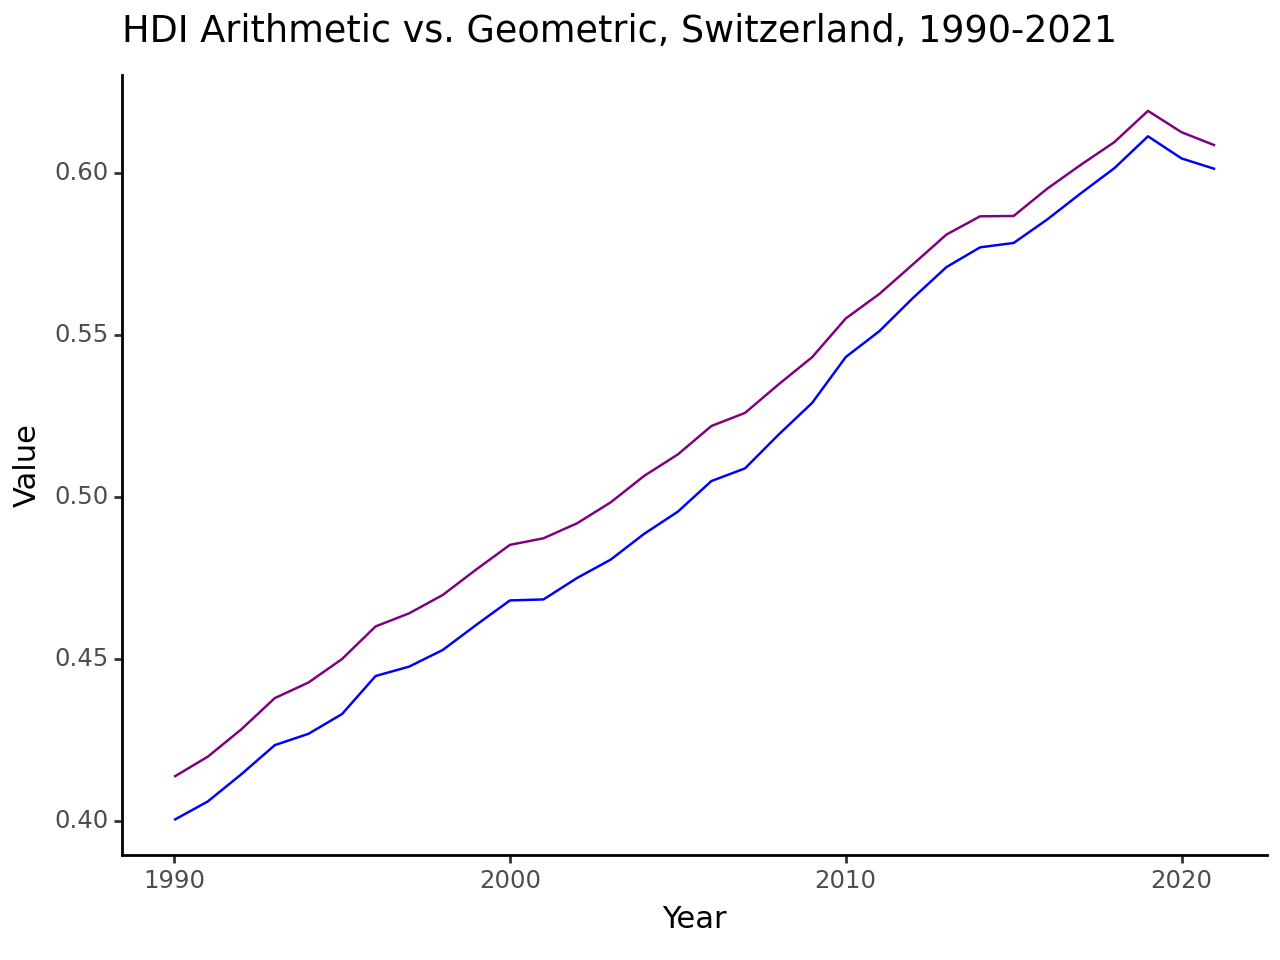

<Figure Size: (640 x 480)>

In [76]:
(
    ggplot(df_hdi_nepal)
    + geom_line(aes(x='year', y='hdi_arith'), color='purple')
    + geom_line(aes(x='year', y='hdi_geom'), color='blue')
    + xlab('Year')
    + ylab('Value')
    + ggtitle('HDI Arithmetic vs. Geometric, Switzerland, 1990-2021')
    + theme_classic()
)

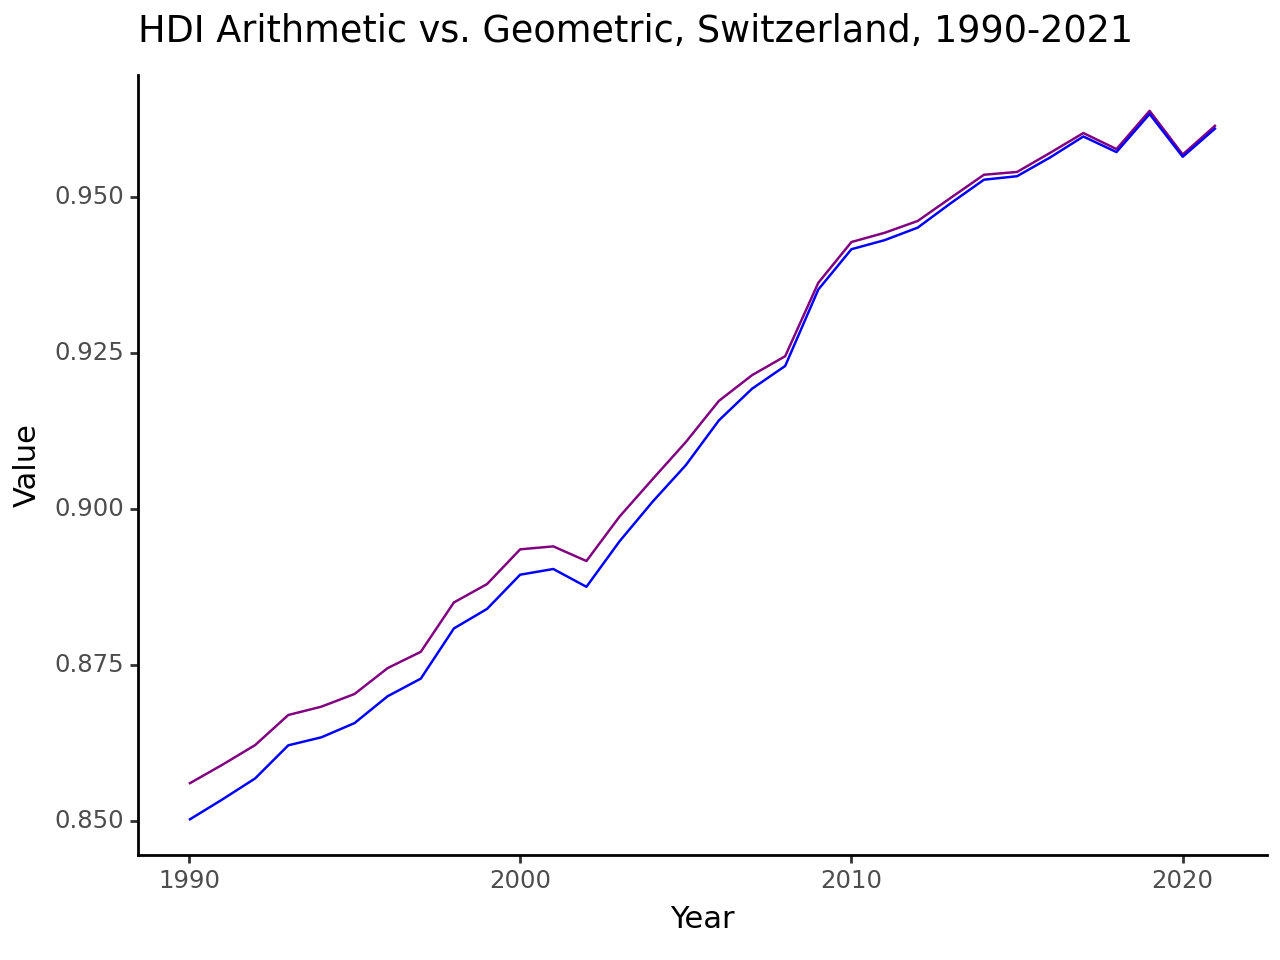

<Figure Size: (640 x 480)>

In [77]:
(
    ggplot(df_hdi_switzerland)
    + geom_line(aes(x='year', y='hdi_arith'), color='purple')
    + geom_line(aes(x='year', y='hdi_geom'), color='blue')
    + xlab('Year')
    + ylab('Value')
    + ggtitle('HDI Arithmetic vs. Geometric, Switzerland, 1990-2021')
    + theme_classic()
)

In [78]:
# The geometric values are much lower than the arithmetic values
# The difference is starker for Nepal than Switzerland
# This speaks to Sagar and Najam's point that the arithmetic mean "masks trade-offs between various dimensions,"
# because there may be greater deficiencies in the component indices for Nepal
# The arithmetic mean (of component indices) is more biased towards changes in individual indicators than the geometric mean (a composite index)
# The geometric mean allows you appropriately aggregate indicators of different scales (treating scales in the same way)

In [79]:
# Part 4: MPI vs Income Poverty
# rename and filter the MPI data for the purposes of the regression
df_mpi
df_mpi.rename(columns={'(%)': 'MPI'}, inplace=True)
df_mpi.rename(columns={'2011-2021': 'IPL'}, inplace=True)

In [80]:
df_mpi

,Country,MPI,IPL
0,Albania,0.703561,0.021277
1,Algeria,1.380835,0.455468
2,Argentina,0.432323,0.958847
3,Bangladesh,24.640573,13.468303
4,Benin,66.798888,19.896006
...,...,...,...
106,Timor-Leste,48.253700,24.443077
107,Trinidad and Tobago,0.636561,..
108,Uganda,57.168485,42.207729
109,Ukraine,0.244237,0.028826


In [81]:
df_mpi.IPL = df_mpi.IPL.replace(['..'], np.nan)

In [82]:
df_mpi.IPL.astype('float64')

0       0.021277
1       0.455468
2       0.958847
3      13.468303
4      19.896006
         ...    
106    24.443077
107          NaN
108    42.207729
109     0.028826
110    19.802757
Name: IPL, Length: 111, dtype: float64

In [83]:
df_mpi_notnull = df_mpi[df_mpi.IPL.notnull()]

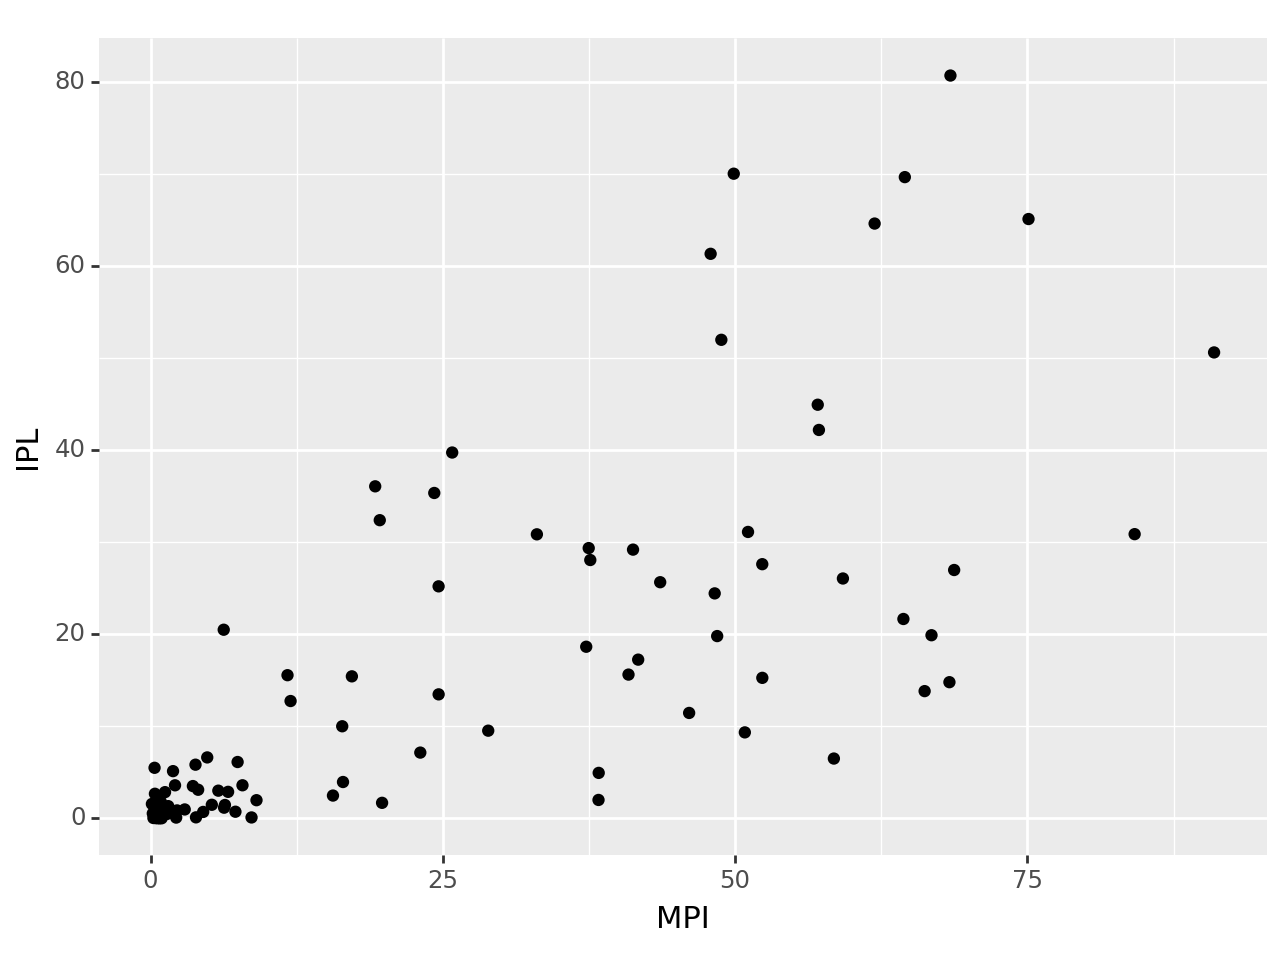

<Figure Size: (640 x 480)>

In [84]:
# plot the poverty headcounts using MPI and the World Bank’s $2.15/day against each other
mpi_plot = ggplot(df_mpi_notnull, aes(x='MPI', y='IPL')) + geom_point()
mpi_plot

In [85]:
# Draw a trend line (or run a simple linear regression, for the advanced) from the origin
# dependent variable is IPL, independent variable is MPI
reg1='IPL~MPI'
# uses statsmodels formula for ordinary least squares
reg1output=smf.ols(reg1, df_mpi_notnull).fit()

In [86]:
print(reg1output.summary())

                            OLS Regression Results                            
Dep. Variable:                    IPL   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     106.1
Date:                Sat, 24 Feb 2024   Prob (F-statistic):           6.06e-17
Time:                        18:52:19   Log-Likelihood:                -370.65
No. Observations:                  93   AIC:                             745.3
Df Residuals:                      91   BIC:                             750.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6573      1.928      0.860      0.3

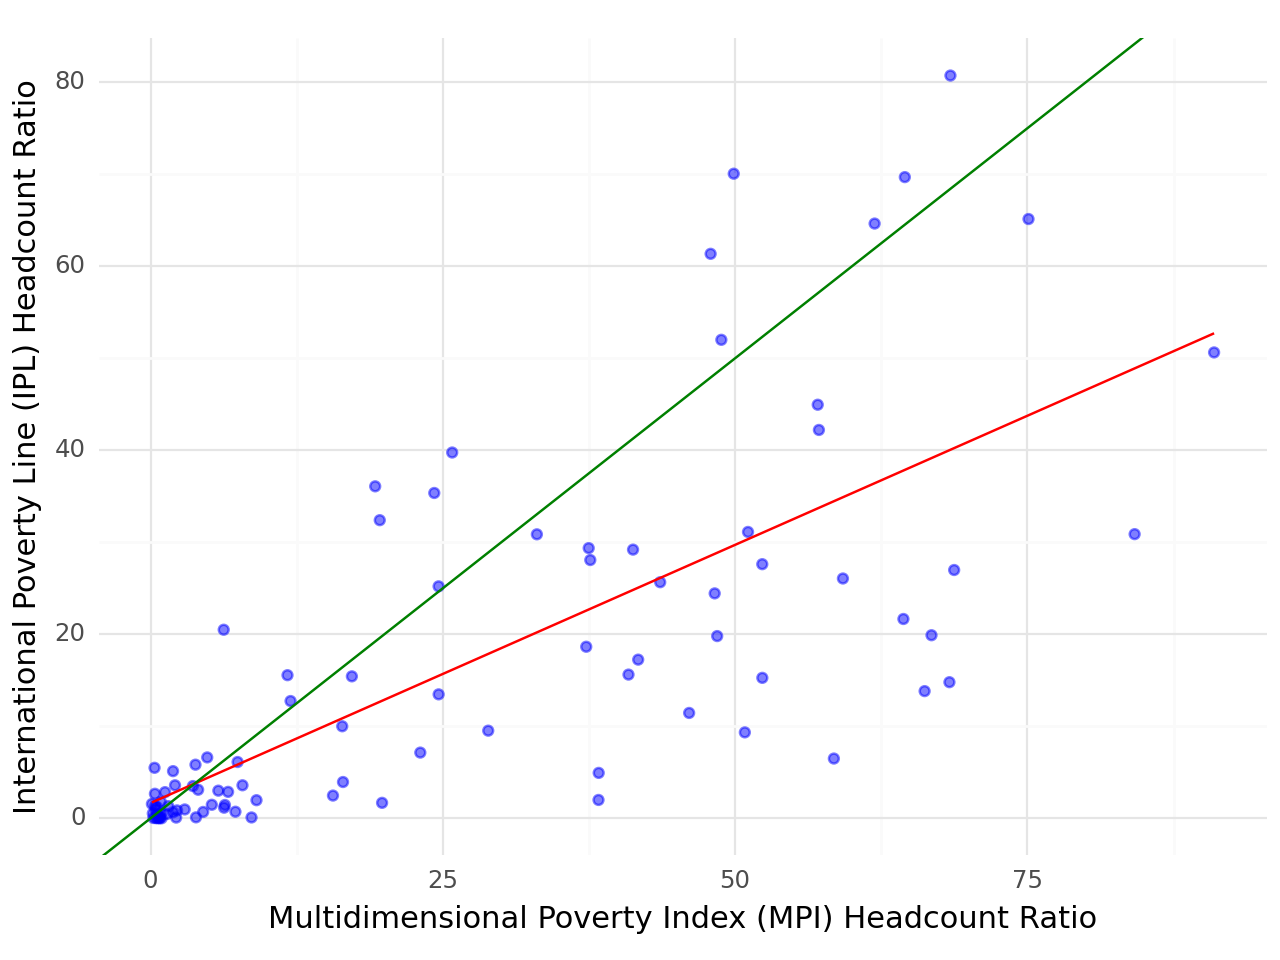

<Figure Size: (640 x 480)>

In [87]:
# plot everything together with a 45 degree line for comparison
(
    ggplot(aes('MPI','IPL'), df_mpi_notnull)
    + geom_point(alpha=0.5, color = 'blue')
    + geom_line(aes(y='reg1output.fittedvalues'), color = 'red')
    + geom_abline(intercept=0, slope=1, color='green')
    + xlab('Multidimensional Poverty Index (MPI) Headcount Ratio')
    + ylab('International Poverty Line (IPL) Headcount Ratio')
    + theme_minimal()
)

In [88]:
# Comment on the regression line's slope relative to a 45 degree line (slope of 1). Are most countries income- or MPI-poor?
# The MPI/IPL regression line has a lower slope than the 45-degree diagonal (0.56<1)
# This indicates that for a 1-unit change in MPI, there is a corresponding 0.56-unit change in IPL
# Overall, the 93 countries depicted here are more MPI-poor than IPL-poor

In [89]:
# add country labels for better comparison with Alkire and Santos
MPI_to_IPL_labels = (
    ggplot(df_mpi_notnull, aes(x='MPI', y='IPL', label='Country')) +
    geom_point(alpha=0.5, color='blue') +
    geom_line(aes(y=reg1output.fittedvalues), color='red') +
    geom_abline(intercept=0, slope=1, color='green') +
    geom_text(size=4, nudge_y=0.1) +
    xlab('Multidimensional Poverty Index (MPI) Headcount Ratio') +
    ylab('International Poverty Line (IPL) Headcount Ratio') +
    theme_minimal() +
    theme(
        figure_size=(10, 10),
        axis_text=element_text(size=10),
        axis_title=element_text(size=12),
    )
)

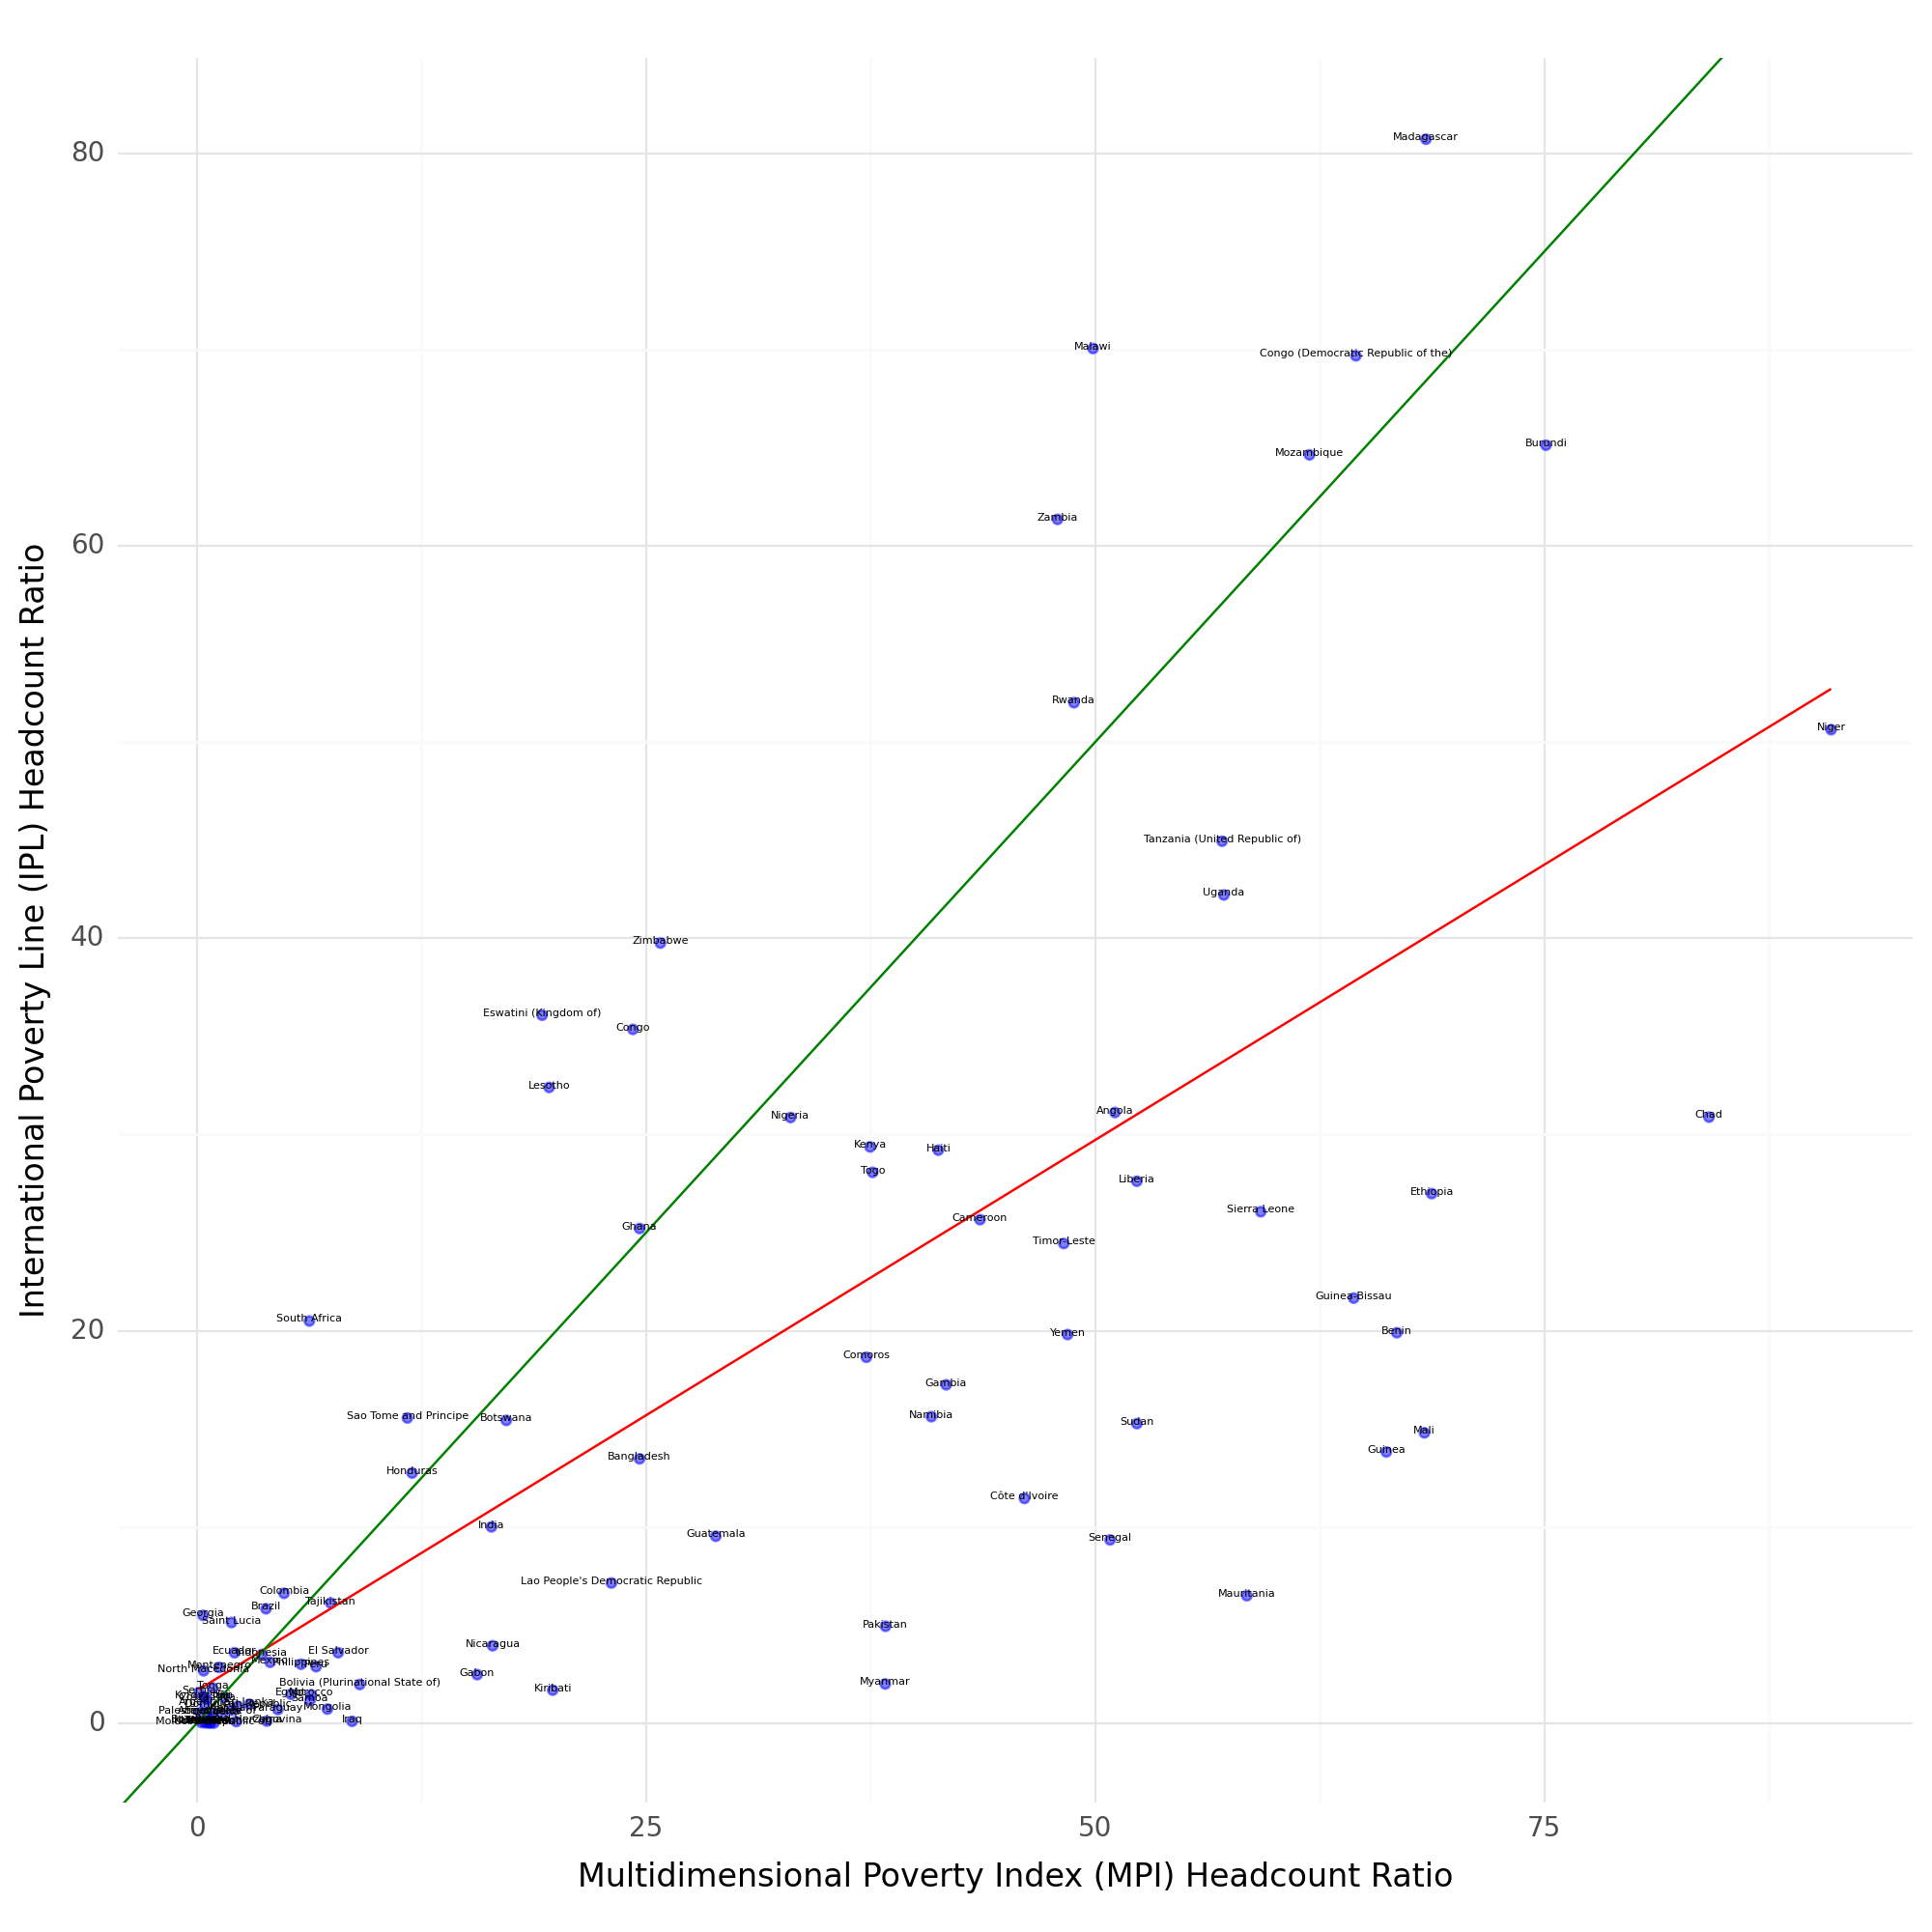

<Figure Size: (1000 x 1000)>

In [90]:
MPI_to_IPL_labels

In [91]:
# drive.mount('/content/drive')

In [92]:
# MPI_to_IPL_labels.save(filename='/content/drive/My Drive/Colab Notebooks/ENV 789/MPI_to_IPL_labels.png', width=10, height=8, dpi=300)

In [93]:
# Do the data corroborate the similar graph with older data you saw in the Alkire reading?
# I assume this refers to "Figure 3" from Alkire and Santos (2014)
# The graphs are somewhat similar, but the slope of this line with more recent data is even lower (in relation to the 45-degree diagonal) than in Figure 3
# So the MPI headcount ratio is still higher (more MPI-poor), though the country placements don't really correspond with Figure 3
# For example, Kenya's MPI headcount ratio is closer to the IPL headcount ratio in this graph, whereas it was much higher in Figure 3

In [94]:
# Which countries are outliers, and why do you think (only thoughtful speculation required here)?
# In this chart, the countries above the 45-degree line (more IPL-poor) all appear to be Sub-Saharan African countries
# This indicates that for these countries, the MPI headcount (capturing three dimensions of Health, Education, and Living Standard) is lower than the headcount of those below the IPL threshold in purchasing power parity
# Because the MPI does not include income, income poverty seems to be outweighing poverty in the three MPI dimensions for these countries.
# This reflects Alkire and Santos's insight that through the MPI "one can assess the average simlutaneous deprivations...Countries with higher MPI headcount ratios tend to have higher average intensity."
# Even though these countries have high MPI headcounts, their income poverty is comparably higher.